# Data Prediction and Classifier
We are going over the following algorithms and discuss their outcome in pokemon winner prediction.
* Linear Regression
* Logistic Regression
* SVM (optional)
* KNN Classifier
* Perceptron (HW)
* Decision Tree
* Random Forest

At the end, students have reading assignments on advantages and disadvantages for each of the machine learning algorithms.

In [33]:
import pandas as pd
combats = pd.read_csv('combats.csv')
pokemon = pd.read_csv('pokemon.csv')
pokemon.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [34]:
names_dict = dict(zip(pokemon['#'], pokemon['Name']))
cols = ["First_pokemon","Second_pokemon","Winner"]
combats_name = combats[cols].replace(names_dict)
combats_name.head()

,First_pokemon,Second_pokemon,Winner
0,Larvitar,Nuzleaf,Nuzleaf
1,Virizion,Terrakion,Terrakion
2,Togetic,Beheeyem,Beheeyem
3,Slugma,Druddigon,Druddigon
4,Omastar,Shuckle,Omastar


In [35]:
pokemon["stats_sum"] = pokemon["HP"] + pokemon["Attack"] + pokemon["Defense"] + pokemon["Sp. Atk"] + pokemon["Sp. Def"] + pokemon["Speed"]


In [36]:
names_dict = dict(zip(pokemon['#'], pokemon['Name']))
cols = ["First_pokemon","Second_pokemon","Winner"]
#combats_name = combats[cols].replace(names_dict)
#combats_name.head()
combats_names = combats[cols].replace(names_dict)

To get the wining ratio for each pokemon in all combats, we deal with two cases:
1. The pokemon is involved in a battle
2. The pokemon has not been involved in any battle on our record.

To count the number of battles a pokemon wins, use series.value_count() function. See https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html#pandas.Series.value_counts
for the doc.
Note that the value_counts() function returns a series which uses the key being counted as index in the result. Below the pokemons are indices after value_counts().

In [37]:
first_num = combats_names["First_pokemon"].value_counts()
second_num = combats_names["Second_pokemon"].value_counts()
battle_num = first_num + second_num #Total battle number for a pokemon
battle_win = pd.DataFrame({"battle": battle_num, "win": combats_names["Winner"].value_counts()}, columns=["battle", "win"])
battle_win["ratio"] = battle_win["win"]/battle_win["battle"]
battle_win.sort_values(by=["ratio"], ascending=False).head(10)

,battle,win,ratio
Mega Aerodactyl,129,127.0,0.984496
Weavile,119,116.0,0.974790
Tornadus Therian Forme,125,121.0,0.968000
Mega Beedrill,119,115.0,0.966387
Aerodactyl,141,136.0,0.964539
Mega Lopunny,129,124.0,0.961240
Greninja,127,122.0,0.960630
Meloetta Pirouette Forme,123,118.0,0.959350
Mega Mewtwo Y,125,119.0,0.952000
Mega Sharpedo,120,114.0,0.950000


In [38]:
#Any one loses all battle?
battle_win[battle_win["win"].isnull()]

,battle,win,ratio
Shuckle,135,NaN,NaN


In [39]:
#Mannually adjust nan cells
battle_win.loc["Shuckle", ["win", "ratio"]] = 0
battle_win[battle_win.index=="Shuckle"]

,battle,win,ratio
Shuckle,135,0.0,0.0


In [40]:

battle_win["Name"] = battle_win.index #Add a column for names
battle_win.head()


,battle,win,ratio,Name
Abomasnow,121,60.0,0.495868,Abomasnow
Abra,108,35.0,0.324074,Abra
Absol,129,89.0,0.689922,Absol
Accelgor,128,118.0,0.921875,Accelgor
Aegislash Blade Forme,128,64.0,0.500000,Aegislash Blade Forme


In [41]:
#Map pokemon Name to id #, then map id# to their wining ratio
id_dict = dict(zip(pokemon['Name'], pokemon['#']))
battle_win["#"] = battle_win["Name"].replace(id_dict)

ratio_dict = dict(zip(battle_win['#'], battle_win['ratio']))
pokemon["ratio"] = pokemon["#"].replace(ratio_dict)
pokemon.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,stats_sum,ratio
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,318,0.278195
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,405,0.380165
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,525,0.674242
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False,625,0.560000
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,309,0.491071


In [42]:
#who never gets a battle has the ratio remained as the id #

nobattle_pokemon = pokemon[pokemon["ratio"]>1]
print ("There are {} pokemons have NaN ratio.".format(len(nobattle_pokemon.index)))
nobattle_pokemon[["#", "Name", "ratio"]]

There are 17 pokemons have NaN ratio.


,#,Name,ratio
11,12,Blastoise,12.0
32,33,Sandshrew,33.0
45,46,Wigglytuff,46.0
62,63,NaN,63.0
65,66,Poliwag,66.0
77,78,Victreebel,78.0
89,90,Magneton,90.0
143,144,Ditto,144.0
182,183,Ariados,183.0
235,236,Ursaring,236.0


In [43]:
#Note there is a nan name for id# = 63
pokemon.loc[62, "Name"] = "Primeape" #Hard coded name overwritten
pokemon[pokemon["Name"]=="Primeape"]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,stats_sum,ratio
62,63,Primeape,Fighting,NaN,65,105,60,60,70,95,1,False,455,63.0


0.6503464720353671


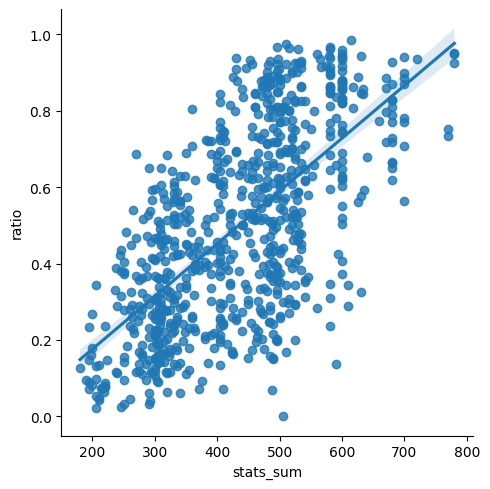

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
%matplotlib inline
battle_pokemon = pokemon[pokemon["ratio"] <= 1]
sns.lmplot(x="stats_sum", y="ratio", data=battle_pokemon)
r,p = sp.stats.pearsonr(battle_pokemon['stats_sum'], battle_pokemon['ratio'])
print(r)

In [48]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression() #continuous predictor
#to convert a dataframe to a column, we use reshape(-1,1)
linreg.fit(battle_pokemon["stats_sum"].values.reshape(-1, 1), battle_pokemon["ratio"].values.reshape(-1, 1))


LinearRegression()

Side notes: linreg also works with multi-dimentional variables. Check the doc below:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [51]:
#Data cleanning:
#Fill in reasonable winning ratio for pokemons who never get involved in a battle of our record
nobattle_pokemon["ratio"] = linreg.predict(nobattle_pokemon["stats_sum"].values.reshape(-1, 1))
nobattle_pokemon[["#", "Name", "ratio"]] #

<ipython-input-51-bb2155294394>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nobattle_pokemon["ratio"] = linreg.predict(nobattle_pokemon["stats_sum"].values.reshape(-1, 1))


,#,Name,ratio
11,12,Blastoise,0.631706
32,33,Sandshrew,0.314318
45,46,Wigglytuff,0.500611
62,63,NaN,0.528210
65,66,Poliwag,0.314318
77,78,Victreebel,0.576508
89,90,Magneton,0.542009
143,144,Ditto,0.297758
182,183,Ariados,0.438513
235,236,Ursaring,0.590307


In [52]:
##data cleaning for Type1 and Type 2

#print ("There are {} Types.".format(len(pokemon["Type 1"].drop_duplicates())))
#list(pokemon["Type 1"].drop_duplicates())
type_cols = ["Type 1", "Type 2"]
#print ("There are {} unique type-combinations.".format(len(pokemon[type_cols].drop_duplicates())))
pokemon["Type 2"] = pokemon["Type 2"].fillna("None")


In [55]:
#impact rate by type
#source: https://pokemondb.net/type
#chart key:  No effect (0%)
#Not very effective (50%)
#Normal (100%)
#Super-effective (200%)
Normal = {"Normal": 1, "Fighting": 1, "Poison": 1, "Ground": 1, "Flying": 1, "Bug": 1, "Rock": 0.5, "Ghost": 0, "Steel": 0.5, "Fire": 1, "Water": 1, "Electric": 1, "Grass": 1, "Ice": 1, "Psychic": 1, "Dragon": 1, "Dark": 1, "Fairy": 1}
Fighting = {"Normal": 2, "Fighting": 1, "Poison": 0.5, "Ground": 1, "Flying": 0.5, "Bug": 0.5, "Rock": 2, "Ghost": 0, "Steel": 2, "Fire": 1, "Water": 1, "Electric": 1, "Grass": 1, "Ice": 2, "Psychic": 0.5, "Dragon": 1, "Dark": 2, "Fairy": 0.5}
Poison = {"Normal": 1, "Fighting": 1, "Poison": 0.5, "Ground": 0.5, "Flying": 1, "Bug": 1, "Rock": 0.5, "Ghost": 0.5, "Steel": 0, "Fire": 1, "Water": 1, "Electric": 1, "Grass": 2, "Ice": 1, "Psychic": 1, "Dragon": 1, "Dark": 1, "Fairy": 2}
Ground = {"Normal": 1, "Fighting": 1, "Poison": 2, "Ground": 1, "Flying": 0, "Bug": 0.5, "Rock": 2, "Ghost": 1, "Steel": 2, "Fire": 2, "Water": 1, "Electric": 2, "Grass": 0.5, "Ice": 1, "Psychic": 1, "Dragon": 1, "Dark": 1, "Fairy": 1}
Flying = {"Normal": 1, "Fighting": 2, "Poison": 1, "Ground": 1, "Flying": 1, "Bug": 2, "Rock": 0.5, "Ghost": 1, "Steel": 0.5, "Fire": 1, "Water": 1, "Electric": 0.5, "Grass": 2, "Ice": 1, "Psychic": 1, "Dragon": 1, "Dark": 1, "Fairy": 1}
Bug = {"Normal": 1, "Fighting": 0.5, "Poison": 0.5, "Ground": 1, "Flying": 0.5, "Bug": 1, "Rock": 1, "Ghost": 0.5, "Steel": 0.5, "Fire": 0.5, "Water": 1, "Electric": 1, "Grass": 2, "Ice": 1, "Psychic": 2, "Dragon": 1, "Dark": 2, "Fairy": 0.5}
Rock = {"Normal": 1, "Fighting": 0.5, "Poison": 1, "Ground": 0.5, "Flying": 2, "Bug": 2, "Rock": 1, "Ghost": 1, "Steel": 0.5, "Fire": 2, "Water": 1, "Electric": 1, "Grass": 1, "Ice": 2, "Psychic": 1, "Dragon": 1, "Dark": 1, "Fairy": 1}
Ghost = {"Normal": 0, "Fighting": 1, "Poison": 1, "Ground": 1, "Flying": 1, "Bug": 1, "Rock": 1, "Ghost": 2, "Steel": 1, "Fire": 1, "Water": 1, "Electric": 1, "Grass": 1, "Ice": 1, "Psychic": 2, "Dragon": 1, "Dark": 0.5, "Fairy": 1}
Steel = {"Normal": 1, "Fighting": 1, "Poison": 1, "Ground": 1, "Flying": 1, "Bug": 1, "Rock": 2, "Ghost": 1, "Steel": 0.5, "Fire": 0.5, "Water": 0.5, "Electric": 0.5, "Grass": 1, "Ice": 2, "Psychic": 1, "Dragon": 1, "Dark": 1, "Fairy": 0.5}
Fire = {"Normal": 1, "Fighting": 1, "Poison": 1, "Ground": 1, "Flying": 1, "Bug": 2, "Rock": 0.5, "Ghost": 1, "Steel": 2, "Fire": 0.5, "Water": 0.5, "Electric": 1, "Grass": 2, "Ice": 2, "Psychic": 1, "Dragon": 0.5, "Dark": 1, "Fairy": 1}
Water = {"Normal": 1, "Fighting": 1, "Poison": 1, "Ground": 2, "Flying": 1, "Bug": 1, "Rock": 2, "Ghost": 1, "Steel": 1, "Fire": 2, "Water": 0.5, "Electric": 1, "Grass": 0.5, "Ice": 1, "Psychic": 1, "Dragon": 0.5, "Dark": 1, "Fairy": 1}
Electric = {"Normal": 1, "Fighting": 1, "Poison": 1, "Ground": 0, "Flying": 2, "Bug": 1, "Rock": 1, "Ghost": 1, "Steel": 1, "Fire": 1, "Water": 2, "Electric": 0.5, "Grass": 0.5, "Ice": 1, "Psychic": 1, "Dragon": 0.5, "Dark": 1, "Fairy": 1}
Grass = {"Normal": 1, "Fighting": 1, "Poison": 0.5, "Ground": 2, "Flying": 0.5, "Bug": 0.5, "Rock": 2, "Ghost": 1, "Steel": 0.5, "Fire": 0.5, "Water": 2, "Electric": 1, "Grass": 0.5, "Ice": 1, "Psychic": 1, "Dragon": 0.5, "Dark": 1, "Fairy": 1}
Ice = {"Normal": 1, "Fighting": 1, "Poison": 1, "Ground": 2, "Flying": 2, "Bug": 1, "Rock": 1, "Ghost": 1, "Steel": 0.5, "Fire": 0.5, "Water": 0.5, "Electric": 1, "Grass": 2, "Ice": 0.5, "Psychic": 1, "Dragon": 2, "Dark": 1, "Fairy": 1}
Psychic = {"Normal": 1, "Fighting": 1, "Poison": 2, "Ground": 2, "Flying": 1, "Bug": 1, "Rock": 1, "Ghost": 1, "Steel": 0.5, "Fire": 1, "Water": 1, "Electric": 1, "Grass": 1, "Ice": 1, "Psychic": 0.5, "Dragon": 1, "Dark": 0, "Fairy": 1}
Dragon = {"Normal": 1, "Fighting": 1, "Poison": 1, "Ground": 1, "Flying": 1, "Bug": 1, "Rock": 1, "Ghost": 1, "Steel": 0.5, "Fire": 1, "Water": 1, "Electric": 1, "Grass": 1, "Ice": 1, "Psychic": 1, "Dragon": 2, "Dark": 1, "Fairy": 0}
Dark = {"Normal": 1, "Fighting": 0.5, "Poison": 1, "Ground": 1, "Flying": 1, "Bug": 1, "Rock": 1, "Ghost": 2, "Steel": 1, "Fire": 1, "Water": 1, "Electric": 1, "Grass": 1, "Ice": 1, "Psychic": 2, "Dragon": 1, "Dark": 0.5, "Fairy": 0.5}
Fairy = {"Normal": 1, "Fighting": 2, "Poison": 0.5, "Ground": 1, "Flying": 1, "Bug": 1, "Rock": 1, "Ghost": 1, "Steel": 0.5, "Fire": 0.5, "Water": 1, "Electric": 1, "Grass": 1, "Ice": 1, "Psychic": 1, "Dragon": 2, "Dark": 2, "Fairy": 1}

type_relation = {"Normal": Normal, "Fighting": Fighting, "Poison": Poison, "Ground": Ground, "Flying": Flying, "Bug": Bug, "Rock": Rock, "Ghost": Ghost, "Steel": Steel, "Fire": Fire, "Water": Water, "Electric": Electric, "Grass": Grass, "Ice": Ice, "Psychic": Psychic, "Dragon": Dragon, "Dark": Dark, "Fairy": Fairy}
df_type_relation = pd.DataFrame(type_relation)
print ("Row is Defender, Column is Attacker")
df_type_relation

Row is Defender, Column is Attacker


,Normal,Fighting,Poison,Ground,Flying,Bug,Rock,Ghost,Steel,Fire,Water,Electric,Grass,Ice,Psychic,Dragon,Dark,Fairy
Normal,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Fighting,1.0,1.0,1.0,1.0,2.0,0.5,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,2.0
Poison,1.0,0.5,0.5,2.0,1.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,2.0,1.0,1.0,0.5
Ground,1.0,1.0,0.5,1.0,1.0,1.0,0.5,1.0,1.0,1.0,2.0,0.0,2.0,2.0,2.0,1.0,1.0,1.0
Flying,1.0,0.5,1.0,0.0,1.0,0.5,2.0,1.0,1.0,1.0,1.0,2.0,0.5,2.0,1.0,1.0,1.0,1.0
Bug,1.0,0.5,1.0,0.5,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,1.0
Rock,0.5,2.0,0.5,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0
Ghost,0.0,0.0,0.5,1.0,1.0,0.5,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0
Steel,0.5,2.0,0.0,2.0,0.5,0.5,0.5,1.0,0.5,2.0,1.0,1.0,0.5,0.5,0.5,0.5,1.0,0.5
Fire,1.0,1.0,1.0,2.0,1.0,0.5,2.0,1.0,0.5,0.5,2.0,1.0,0.5,0.5,1.0,1.0,1.0,0.5


In [56]:
#convert type, a string, to type, a float (type advantage).

pokemon["Type"] = pokemon.apply(lambda x: x["Type 1"]+"/"+x["Type 2"], axis=1)
type_dict = dict(zip(pokemon['#'], pokemon['Type']))
combats_type = combats[cols].replace(type_dict)
combats_type["Loser"] = combats_type.apply(lambda x: x["First_pokemon"] if x["First_pokemon"] !=  x["Winner"] else x["Second_pokemon"], axis = 1)
combats_type

,First_pokemon,Second_pokemon,Winner,Loser
0,Rock/Ground,Grass/Dark,Grass/Dark,Rock/Ground
1,Grass/Fighting,Rock/Fighting,Rock/Fighting,Grass/Fighting
2,Fairy/Flying,Psychic/None,Psychic/None,Fairy/Flying
3,Fire/None,Dragon/None,Dragon/None,Fire/None
4,Rock/Water,Bug/Rock,Rock/Water,Bug/Rock
...,...,...,...,...
49995,Dragon/Fire,Water/None,Dragon/Fire,Water/None
49996,Ground/None,Electric/None,Ground/None,Electric/None
49997,Water/Flying,Normal/None,Normal/None,Water/Flying
49998,Electric/None,Electric/Steel,Electric/None,Electric/Steel


In [59]:

#0 (no damage) will be changed to 0.25
#so that later on the product won't be 0.
zero_dict = {0: 0.25}
df_type_relation = df_type_relation[:].replace(zero_dict)
df_type_relation.head(18)


,Normal,Fighting,Poison,Ground,Flying,Bug,Rock,Ghost,Steel,Fire,Water,Electric,Grass,Ice,Psychic,Dragon,Dark,Fairy
Normal,1.00,2.00,1.00,1.00,1.0,1.0,1.0,0.25,1.0,1.0,1.0,1.00,1.0,1.0,1.00,1.00,1.0,1.0
Fighting,1.00,1.00,1.00,1.00,2.0,0.5,0.5,1.00,1.0,1.0,1.0,1.00,1.0,1.0,1.00,1.00,0.5,2.0
Poison,1.00,0.50,0.50,2.00,1.0,0.5,1.0,1.00,1.0,1.0,1.0,1.00,0.5,1.0,2.00,1.00,1.0,0.5
Ground,1.00,1.00,0.50,1.00,1.0,1.0,0.5,1.00,1.0,1.0,2.0,0.25,2.0,2.0,2.00,1.00,1.0,1.0
Flying,1.00,0.50,1.00,0.25,1.0,0.5,2.0,1.00,1.0,1.0,1.0,2.00,0.5,2.0,1.00,1.00,1.0,1.0
Bug,1.00,0.50,1.00,0.50,2.0,1.0,2.0,1.00,1.0,2.0,1.0,1.00,0.5,1.0,1.00,1.00,1.0,1.0
Rock,0.50,2.00,0.50,2.00,0.5,1.0,1.0,1.00,2.0,0.5,2.0,1.00,2.0,1.0,1.00,1.00,1.0,1.0
Ghost,0.25,0.25,0.50,1.00,1.0,0.5,1.0,2.00,1.0,1.0,1.0,1.00,1.0,1.0,1.00,1.00,2.0,1.0
Steel,0.50,2.00,0.25,2.00,0.5,0.5,0.5,1.00,0.5,2.0,1.0,1.00,0.5,0.5,0.50,0.50,1.0,0.5
Fire,1.00,1.00,1.00,2.00,1.0,0.5,2.0,1.00,0.5,0.5,2.0,1.00,0.5,0.5,1.00,1.00,1.0,0.5


In [ ]:

# One stop function for the cummulative type impact score for winner vs loser
def calcRelation(combats_type):
    #Write your code here...


combats_type["Relation"] = combats_type.apply(lambda x: calcRelation(x), axis = 1)
print (combats_type["Relation"].describe())
#sns.distplot(combats_type["Relation"])
#plt.show()

In [ ]:
combats_add_data = combats.copy()
type_dict = dict(zip(pokemon['#'], pokemon['Type']))
hp_dict = dict(zip(pokemon['#'], pokemon['HP']))
attack_dict = dict(zip(pokemon['#'], pokemon['Attack']))
defense_dict = dict(zip(pokemon['#'], pokemon['Defense']))
spattack_dict = dict(zip(pokemon['#'], pokemon['Sp. Atk']))
spdefense_dict = dict(zip(pokemon['#'], pokemon['Sp. Def']))
speed_dict = dict(zip(pokemon['#'], pokemon['Speed']))
stats_sum_dict = dict(zip(pokemon['#'], pokemon['stats_sum']))
ratio_dict = dict(zip(pokemon['#'], pokemon['ratio']))
combats_add_data["First_pokemon_type"] = combats_add_data["First_pokemon"].replace(type_dict)
combats_add_data["First_pokemon_hp"] = combats_add_data["First_pokemon"].replace(hp_dict)
combats_add_data["First_pokemon_attack"] = combats_add_data["First_pokemon"].replace(attack_dict)
combats_add_data["First_pokemon_defense"] = combats_add_data["First_pokemon"].replace(defense_dict)
combats_add_data["First_pokemon_spattack"] = combats_add_data["First_pokemon"].replace(spattack_dict)
combats_add_data["First_pokemon_spdefense"] = combats_add_data["First_pokemon"].replace(spdefense_dict)
combats_add_data["First_pokemon_speed"] = combats_add_data["First_pokemon"].replace(speed_dict)
combats_add_data["First_pokemon_stats"] = combats_add_data["First_pokemon"].replace(stats_sum_dict)
combats_add_data["First_pokemon_ratio"] = combats_add_data["First_pokemon"].replace(ratio_dict)
combats_add_data["Second_pokemon_type"] = combats_add_data["Second_pokemon"].replace(type_dict)
combats_add_data["Second_pokemon_hp"] = combats_add_data["Second_pokemon"].replace(hp_dict)
combats_add_data["Second_pokemon_attack"] = combats_add_data["Second_pokemon"].replace(attack_dict)
combats_add_data["Second_pokemon_defense"] = combats_add_data["Second_pokemon"].replace(defense_dict)
combats_add_data["Second_pokemon_spattack"] = combats_add_data["Second_pokemon"].replace(spattack_dict)
combats_add_data["Second_pokemon_spdefense"] = combats_add_data["Second_pokemon"].replace(spdefense_dict)
combats_add_data["Second_pokemon_speed"] = combats_add_data["Second_pokemon"].replace(speed_dict)
combats_add_data["Second_pokemon_stats"] = combats_add_data["Second_pokemon"].replace(stats_sum_dict)
combats_add_data["Second_pokemon_ratio"] = combats_add_data["Second_pokemon"].replace(ratio_dict)


def calcTypeRelation(combats_add_data):

    first_type1 = combats_add_data["First_pokemon_type"].split("/")[0]
    first_type2 = combats_add_data["First_pokemon_type"].split("/")[1]
    second_type1 = combats_add_data["Second_pokemon_type"].split("/")[0]
    second_type2 = combats_add_data["Second_pokemon_type"].split("/")[1]

    #Write your code here to build combats_add_datas' impact rate product.

    return r

combats_add_data["Relation"] = combats_add_data.apply(lambda x: calcTypeRelation(x), axis = 1)
combats_add_data["First_win"] = combats_add_data.apply(lambda x: 1 if x["First_pokemon"]==x["Winner"] else 0, axis=1)
noneed_cols = ["First_pokemon", "Second_pokemon", "Winner", "First_pokemon_type", "Second_pokemon_type"]
combats_add_data = combats_add_data.drop(noneed_cols, axis=1)
combats_add_data.head()

Data Spliting: Training and Testing

In [ ]:
from sklearn.model_selection import train_test_split

X = combats_add_data.drop("First_win", axis=1)
y = combats_add_data["First_win"]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)
print("X_train.shape = " + str(X_train.shape))
print("X_test.shape = " + str(X_test.shape))
print("y_train.shape = " + str(y_train.shape))
print("y_test.shape = " + str(y_test.shape))

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
acc_log = round(logreg.score(X_test, y_test)*100, 2)
acc_log

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)# Try to change the initial n_neighbors and see how it goes
knn.fit(X_train, y_train)
acc_knn = round(knn.score(X_test, y_test) * 100, 2)
acc_knn

In [ ]:
# Perceptron
#Left as HW5

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
acc_decision_tree = round(decision_tree.score(X_test, y_test) * 100, 2)
acc_decision_tree

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
acc_random_forest = round(random_forest.score(X_test, y_test) * 100, 2)
acc_random_forest

In [ ]:
#Predicting
tests = pd.read_csv('input/tests.csv')
tests_add_data = tests.copy()
tests_add_data["First_pokemon_type"] = tests_add_data["First_pokemon"].replace(type_dict)
tests_add_data["First_pokemon_hp"] = tests_add_data["First_pokemon"].replace(hp_dict)
tests_add_data["First_pokemon_attack"] = tests_add_data["First_pokemon"].replace(attack_dict)
tests_add_data["First_pokemon_defense"] = tests_add_data["First_pokemon"].replace(defense_dict)
tests_add_data["First_pokemon_spattack"] = tests_add_data["First_pokemon"].replace(spattack_dict)
tests_add_data["First_pokemon_spdefense"] = tests_add_data["First_pokemon"].replace(spdefense_dict)
tests_add_data["First_pokemon_speed"] = tests_add_data["First_pokemon"].replace(speed_dict)
tests_add_data["First_pokemon_stats"] = tests_add_data["First_pokemon"].replace(stats_sum_dict)
tests_add_data["First_pokemon_ratio"] = tests_add_data["First_pokemon"].replace(ratio_dict)
tests_add_data["Second_pokemon_type"] = tests_add_data["Second_pokemon"].replace(type_dict)
tests_add_data["Second_pokemon_hp"] = tests_add_data["Second_pokemon"].replace(hp_dict)
tests_add_data["Second_pokemon_attack"] = tests_add_data["Second_pokemon"].replace(attack_dict)
tests_add_data["Second_pokemon_defense"] = tests_add_data["Second_pokemon"].replace(defense_dict)
tests_add_data["Second_pokemon_spattack"] = tests_add_data["Second_pokemon"].replace(spattack_dict)
tests_add_data["Second_pokemon_spdefense"] = tests_add_data["Second_pokemon"].replace(spdefense_dict)
tests_add_data["Second_pokemon_speed"] = tests_add_data["Second_pokemon"].replace(speed_dict)
tests_add_data["Second_pokemon_stats"] = tests_add_data["Second_pokemon"].replace(stats_sum_dict)
tests_add_data["Second_pokemon_ratio"] = tests_add_data["Second_pokemon"].replace(ratio_dict)
tests_add_data["Relation"] = tests_add_data.apply(lambda x: calcTypeRelation(x), axis = 1)
noneed_cols = ["First_pokemon", "Second_pokemon", "First_pokemon_type", "Second_pokemon_type"]
tests_add_data = tests_add_data.drop(noneed_cols, axis=1)
#the random_forest data frame had the best performance in training and testing
y_predict = random_forest.predict(tests_add_data)
data = {"First_pokemon": tests["First_pokemon"], "Second_pokemon": tests["Second_pokemon"], "First_win": y_predict}
submission = pd.DataFrame(data=data, columns=["First_pokemon", "Second_pokemon", "First_win"])
winner = pd.DataFrame(submission.apply(lambda x: x["First_pokemon"] if x["First_win"]==1 else x["Second_pokemon"], axis=1), columns=["Winner"])
submission = pd.concat([submission, winner], axis=1)
submission = submission.drop(["First_win"], axis=1)
submission

### Reading Material
* Linear Regression: Any fundamental stats book
* Logistic Regression: https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc
* SVM (optional): https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47
* KNN Classifier: https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761
* Perceptron: Paper attached with the pokemon notes
* Decision Tree: https://towardsdatascience.com/decision-tree-classifier-explained-in-real-life-picking-a-vacation-destination-6226b2b60575
* Random Forest:https://towardsdatascience.com/understanding-random-forest-58381e0602d2
